# PCA_COS 코드에 모든 과정 정리

# 표준화 후 코사인 거리 기반 군집화
1. kmeans
2. agg
3. meanshift
4. spectral

# 기본설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
user_data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/user_data.csv',encoding='cp949',index_col=0)
user_data.head()

id_formation  matchType  possession  shootInPenalty  \
0  004ed741426633f14e3e8b5b_442       50.0    0.526000        3.200000   
1  009357e613446985dfd18622_451       50.0    0.489375        2.875000   
2  00c0fec278956d51bb63a3a2_523       50.0    0.522667        3.266667   
3  01247880cf81e161d85bf2f3_523       50.0    0.488182        2.545455   
4  014c6e8a031b7941ee2f9b24_433       50.0    0.503750        4.687500   

   shootHeading  shootOutPenalty  shootTotal   in_rate  out_rate  \
0      1.100000         2.800000    7.100000  0.604722  0.395278   
1      0.937500         4.000000    7.812500  0.501940  0.498060   
2      3.533333         1.533333    8.333333  0.832239  0.167761   
3      1.000000         3.272727    6.818182  0.523737  0.476263   
4      0.875000         1.437500    7.000000  0.817560  0.182440   

   heading_rate  ...  center  line2  center_fw_one  center_mf_one  \
0      0.130556  ...     5.0    4.0      45.200000      41.325000   
1      0.129230  ...     4.0    5.0      28.437500      37.250000   
2      0.429663  ...     5.0    2.0      34.977778      37.533333   
3      0.154545  ...     5.0    2.0      28.787879      27.954545   
4      0.121354  ...     4.0    3.0      32.750000      28.958333   

   side_fw_one  side_df_one  center_one   side_one  line2_one   cnt  
0     25.00000    11.800000   42.766667  14.525000  35.800000  10.0  
1     24.90625    15.000000   35.046875  19.953125  32.312500  16.0  
2          NaN    18.266667   36.000000  18.266667  37.533333  15.0  
3          NaN    18.454545   28.454545  18.454545  27.954545  11.0  
4     22.37500    14.656250   29.906250  18.515625  28.958333  16.0  

[5 rows x 84 columns]

In [ ]:
# 포메이션 결합용 데이터
data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/핍파/data.csv',encoding='cp949',index_col=0)
data.head()

matchId            matchDate  matchType  \
0  6430c714a4ebcc072d13f3e7  2023-04-08T10:54:55         50   
1  642dcb56dc1ac4544c53deb8  2023-04-06T04:37:10         50   
2  642c09958e38507a9ae58bc4  2023-04-04T20:37:05         50   
3  642b2e2be02c06eebd0216c2  2023-04-04T05:01:48         50   
4  6426c6325f5c0fd461f34f51  2023-03-31T20:50:42         50   

                                           matchInfo  \
0  {'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...   
1  {'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...   
2  {'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...   
3  {'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...   
4  {'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...   

                         id                  accessId  possession nickname  \
0  4b0a833e4121d0c3f6dc9a2e  4b0a833e4121d0c3f6dc9a2e        0.53      솔깃한   
1  4b0a833e4121d0c3f6dc9a2e  4b0a833e4121d0c3f6dc9a2e        0.62      솔깃한   
2  4b0a833e4121d0c3f6dc9a2e  4b0a833e4121d0c3f6dc9a2e        0.46      솔깃한   
3  4b0a833e4121d0c3f6dc9a2e  4b0a833e4121d0c3f6dc9a2e        0.55      솔깃한   
4  4b0a833e4121d0c3f6dc9a2e  4b0a833e4121d0c3f6dc9a2e        0.47      솔깃한   

  matchResult  shootInPenalty  ...  center_fw_one  center_mf_one  side_fw_one  \
0           패               2  ...           21.0      31.666667         22.5   
1           승               2  ...           34.0      34.333333         30.0   
2           패               3  ...           40.0      23.333333         17.5   
3           패               2  ...           30.0      36.333333         18.5   
4           패               1  ...           25.0      34.000000         24.5   

   side_df_one  center_one  side_one  line2_one  formation  \
0         14.0       29.00     18.25       28.0        451   
1         16.0       34.25     23.00       32.6        451   
2         12.0       27.50     14.75       21.0        451   
3         15.5       34.75     17.00       29.2        451   
4         13.5       31.75     19.00       30.2        451   

                   id_formation  cnt  
0  4b0a833e4121d0c3f6dc9a2e_451   13  
1  4b0a833e4121d0c3f6dc9a2e_451   13  
2  4b0a833e4121d0c3f6dc9a2e_451   13  
3  4b0a833e4121d0c3f6dc9a2e_451   13  
4  4b0a833e4121d0c3f6dc9a2e_451   13  

[5 rows x 92 columns]

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1236
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_formation       1237 non-null   object 
 1   matchType          1237 non-null   float64
 2   possession         1237 non-null   float64
 3   shootInPenalty     1237 non-null   float64
 4   shootHeading       1237 non-null   float64
 5   shootOutPenalty    1237 non-null   float64
 6   shootTotal         1237 non-null   float64
 7   in_rate            1237 non-null   float64
 8   out_rate           1237 non-null   float64
 9   heading_rate       1237 non-null   float64
 10  passTry            1237 non-null   float64
 11  shortPassTry       1237 non-null   float64
 12  longpassTry        1237 non-null   float64
 13  throughpass        1237 non-null   float64
 14  short_rate         1237 non-null   float64
 15  long_rate          1237 non-null   float64
 16  thr_rate           1237 

# EDA

In [ ]:
user_data = pd.merge(user_data,data[['id_formation','formation']],on='id_formation',how='left')
user_data.drop_duplicates(inplace=True)
user_data['df_one'] = (user_data['center_df_posses'] + user_data['center_df_pass']) / user_data['df']
#user_data['shoot_in'] = user_data['shootInPenalty'] + user_data['shootHeading']
#user_data['shoot_out'] = user_data['shootOutPenalty']

In [ ]:
#['possession','shootTotal','in_rate','heading_rate','passTry','short_rate','long_rate','center_mf_rate','side_rate','side_df_rate','intercept']
df = user_data[['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one','formation']]
df

in_rate  heading_rate  short_rate  long_rate   side_one  center_one  \
0      0.604722      0.130556    0.880041   0.035906  14.525000   42.766667   
10     0.501940      0.129230    0.779673   0.068342  19.953125   35.046875   
26     0.832239      0.429663    0.798512   0.060786  18.266667   36.000000   
41     0.523737      0.154545    0.772228   0.058769  18.454545   28.454545   
52     0.817560      0.121354    0.610595   0.051902  18.515625   29.906250   
...         ...           ...         ...        ...        ...         ...   
18243  0.758310      0.057586    0.832230   0.010402  12.058824   34.000000   
18260  0.668385      0.026984    0.785109   0.035314  16.464286   36.571429   
18274  0.570991      0.161253    0.685540   0.075551  21.450000   26.633333   
18289  0.381407      0.161710    0.806856   0.032023  17.475000   29.080000   
18299  0.679788      0.139709    0.780665   0.065776  18.000000   29.586667   

         df_one  formation  
0      4.050000        442  
10     4.109375        451  
26     4.506667        523  
41     4.690909        523  
52     3.515625        433  
...         ...        ...  
18243  4.458824        523  
18260  3.553571        451  
18274  4.616667        451  
18289  3.720000        523  
18299  3.693333        532  

[1237 rows x 8 columns]

In [ ]:
df.corr()

in_rate  heading_rate  short_rate  long_rate  side_one  \
in_rate       1.000000      0.217464   -0.142721   0.095322  0.068067   
heading_rate  0.217464      1.000000   -0.258018   0.428485  0.059299   
short_rate   -0.142721     -0.258018    1.000000  -0.292023  0.167373   
long_rate     0.095322      0.428485   -0.292023   1.000000 -0.057169   
side_one      0.068067      0.059299    0.167373  -0.057169  1.000000   
center_one   -0.062307     -0.243057    0.476015  -0.382494  0.333778   
df_one       -0.110787     -0.014274   -0.060109  -0.033941 -0.080366   
formation    -0.051412      0.012071    0.037753  -0.027790 -0.154445   

              center_one    df_one  formation  
in_rate        -0.062307 -0.110787  -0.051412  
heading_rate   -0.243057 -0.014274   0.012071  
short_rate      0.476015 -0.060109   0.037753  
long_rate      -0.382494 -0.033941  -0.027790  
side_one        0.333778 -0.080366  -0.154445  
center_one      1.000000  0.025138   0.017061  
df_one          0.025138  1.000000   0.340284  
formation       0.017061  0.340284   1.000000

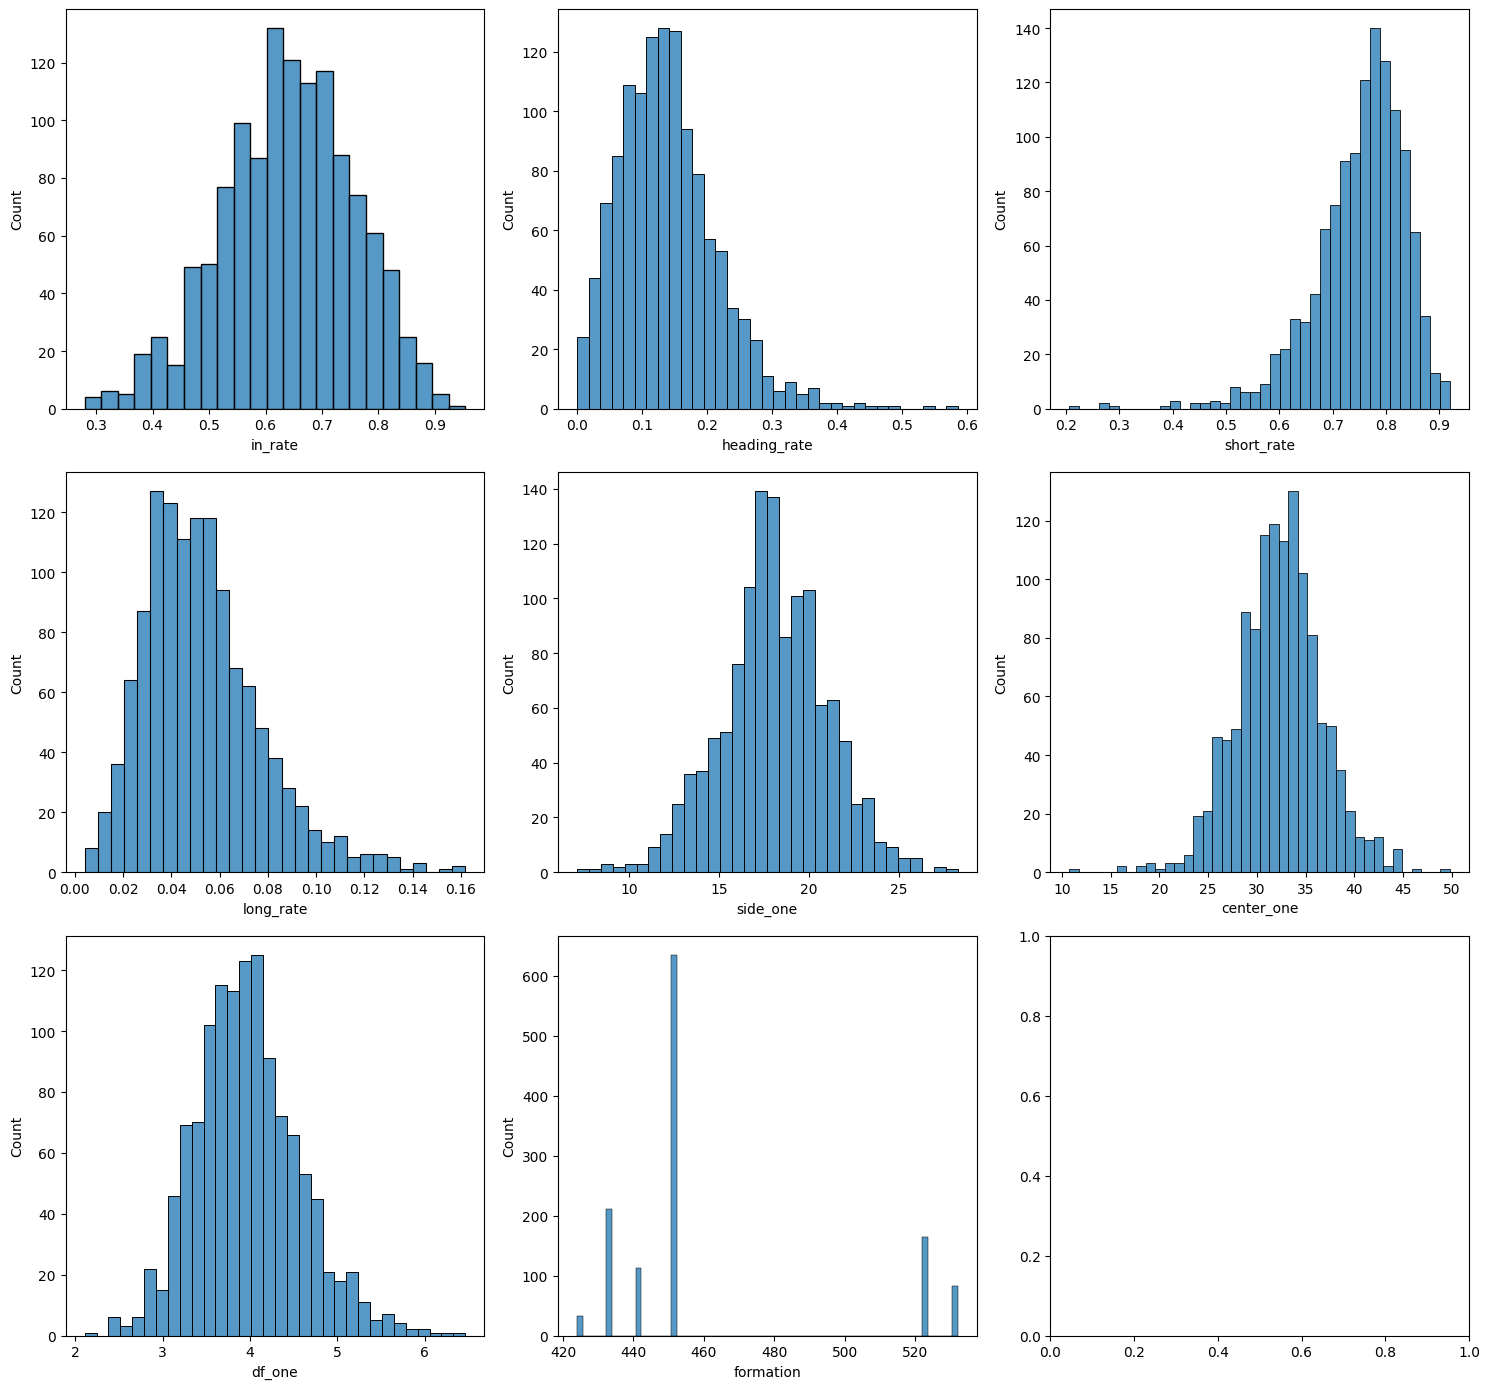

In [ ]:
# 데이터프레임 df의 모든 변수들에 대한 히스토그램을 그립니다.
fig, axs = plt.subplots(nrows=len(df.columns)//3+1, ncols=3, figsize=(15, 5*len(df.columns)//3+1))

for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=var, ax=axs[row, col])

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

in_rate  heading_rate   short_rate    long_rate     side_one  \
count  1237.000000   1237.000000  1237.000000  1237.000000  1237.000000   
mean      0.640656      0.140074     0.751178     0.052804    18.074589   
std       0.117211      0.077061     0.086592     0.024209     2.949930   
min       0.279927      0.000000     0.206241     0.004125     7.088235   
25%       0.562881      0.085967     0.707932     0.035598    16.359375   
50%       0.644892      0.131471     0.766860     0.049272    17.984375   
75%       0.721131      0.182216     0.810287     0.065761    19.950000   
max       0.953549      0.585606     0.920070     0.161810    28.281250   

        center_one       df_one    formation  
count  1237.000000  1237.000000  1237.000000  
mean     32.296207     3.968538   461.324171  
std       4.336384     0.596678    33.136633  
min      10.766667     2.107692   424.000000  
25%      29.597222     3.562500   442.000000  
50%      32.333333     3.937500   451.000000  
75%      34.921053     4.314286   451.000000  
max      49.796875     6.464286   532.000000

# eliminate outlier : logical & 1.5 ~ 3 IQR

In [ ]:
# 추가 이상치 제거 >> 표준화에 영향을 주지않을정도로만..
df = df[df.center_one > 17]
df = df[df.center_one < 46]
df = df[df.side_one > 5]
df = df[df.heading_rate < 0.5] 
df = df[df.short_rate > 0.3]
#df = df[df.defence_fw < 15]

In [ ]:
# pairplot 그리기
sns.pairplot(data=df,hue='formation')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.drop('formation',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

scaler = StandardScaler()
x = scaler.fit_transform(df) # x객체에 x를 표준화한 데이터를 저장
features = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']
X = pd.DataFrame(x, columns=features)
X.head()

in_rate  heading_rate  short_rate  long_rate  side_one  center_one  \
0 -0.302269     -0.114886    1.551117  -0.696068 -1.209063    2.498382   
1 -1.182020     -0.132810    0.326506   0.652081  0.638236    0.646669   
2  1.645137      3.928455    0.556365   0.338051  0.064301    0.875291   
3 -0.995450      0.209409    0.235672   0.254207  0.128240   -0.934605   
4  1.519489     -0.239271   -1.736445  -0.031213  0.149026   -0.586391   

     df_one  
0  0.138116  
1  0.238766  
2  0.912237  
3  1.224557  
4 -0.767732

In [ ]:
round(X.describe(),3)

in_rate  heading_rate  short_rate  long_rate  side_one  center_one  \
count  1226.000      1226.000    1226.000   1226.000  1226.000    1226.000   
mean      0.000        -0.000       0.000     -0.000    -0.000       0.000   
std       1.000         1.000       1.000      1.000     1.000       1.000   
min      -3.082        -1.880      -4.450     -2.017    -3.740      -3.348   
25%      -0.663        -0.715      -0.543     -0.708    -0.584      -0.647   
50%       0.040        -0.103       0.171     -0.144    -0.034       0.008   
75%       0.682         0.576       0.701      0.526     0.637       0.617   
max       2.683         4.731       2.040      4.537     3.472       2.954   

         df_one  
count  1226.000  
mean     -0.000  
std       1.000  
min      -2.659  
25%      -0.684  
50%      -0.053  
75%       0.583  
max       3.986

# Clustering
## 1. kmeans

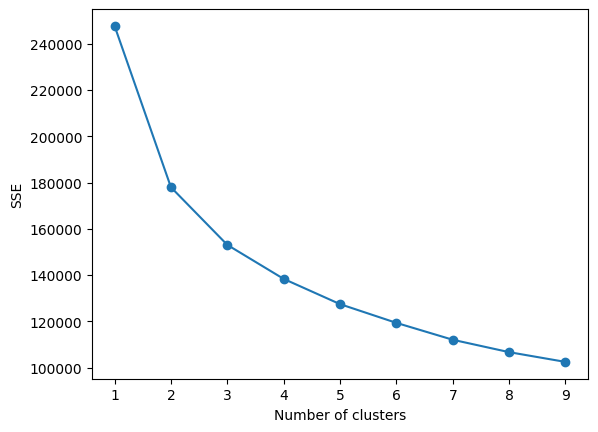

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from collections import Counter

# inertia

# SSE 값을 저장할 리스트 생성
sse = []

# 군집 개수를 1에서 10까지 변화시키면서 KMeans 알고리즘 적용
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10)
    # 거리 행렬 계산
    distances = pairwise_distances(X, metric='cosine')
    km.fit(distances)
    sse.append(km.inertia_)

# 군집 개수에 따른 SSE 그래프 출력
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

4 부터 완만해짐

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def plot_silhouette(X, range_n_clusters, metrics):
    """
    X : 입력 데이터
    range_n_clusters : 군집 개수 범위 (list 형태)
    """
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # 클러스터링 모델 학습
        clusterer = KMeans(n_clusters=n_clusters, random_state=0,n_init=10)
        distances = pairwise_distances(X, metric=metrics)
        cluster_labels = clusterer.fit_predict(distances)

        # 모든 샘플의 실루엣 계수를 계산
        silhouette_avg = silhouette_score(distances, cluster_labels)
        sample_silhouette_values = silhouette_samples(distances, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # i번째 클러스터에 속한 샘플들의 실루엣 계수 값을 추출하여 정렬
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 이름 및 평균 실루엣 계수 값을 그래프에 입력
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            ax.text(0.8, y_lower + 0.5 * size_cluster_i,
                    str(round(np.mean(ith_cluster_silhouette_values), 2)))
            y_lower = y_upper + 10

        ax.set_title("Number of clusters : " + str(n_clusters))
        ax.set_xlabel("Silhouette Coefficient Values :{mean}".format(mean=round(silhouette_avg,2)))
        ax.set_ylabel("Cluster Label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()


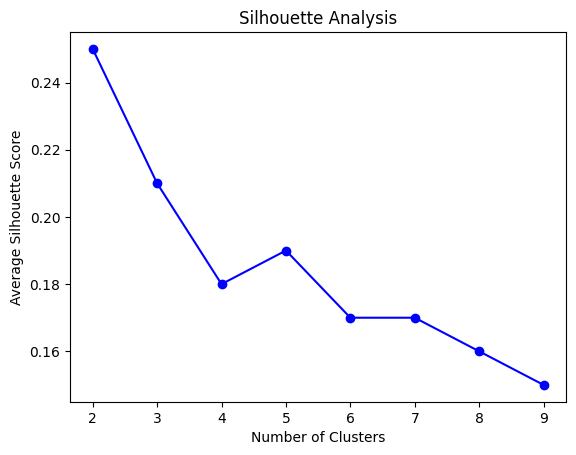

In [ ]:
# 군집 개수 범위 설정
k_min, k_max = 2, 9
k_range = range(k_min, k_max+1)

# 각 군집 개수마다 군집 수행 및 실루엣 점수 계산
sil_scores = []
for k in k_range:
    clusterer = KMeans(n_clusters=k, random_state=0, n_init=10)
    distances = pairwise_distances(X, metric='cosine')
    cluster_labels = clusterer.fit_predict(distances)
    sil_score = silhouette_score(distances, cluster_labels)
    sil_scores.append(round(sil_score,2))

# 평균 실루엣 점수 시각화
plt.plot(k_range, sil_scores, 'o-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(k_range)
plt.show()

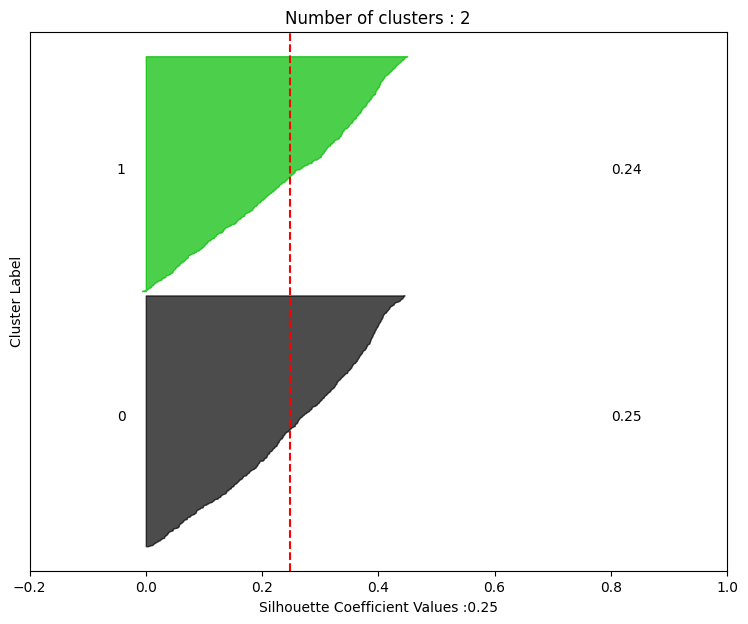

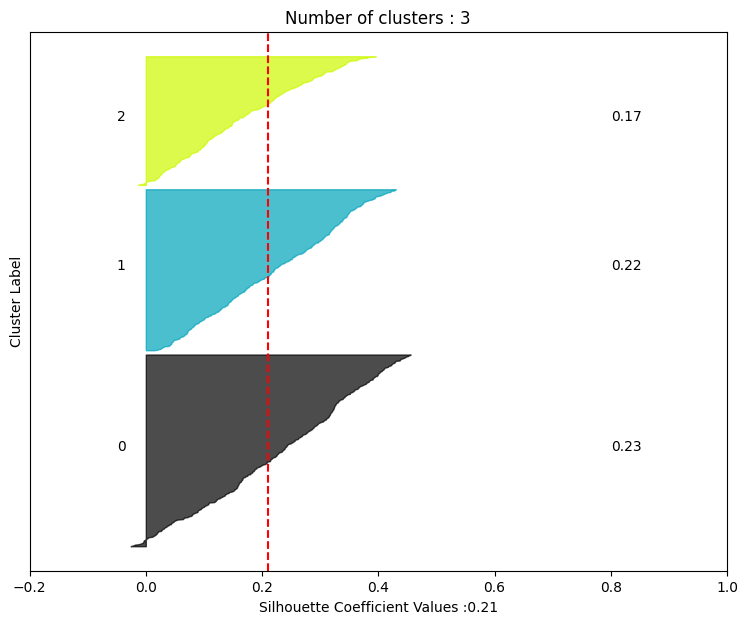

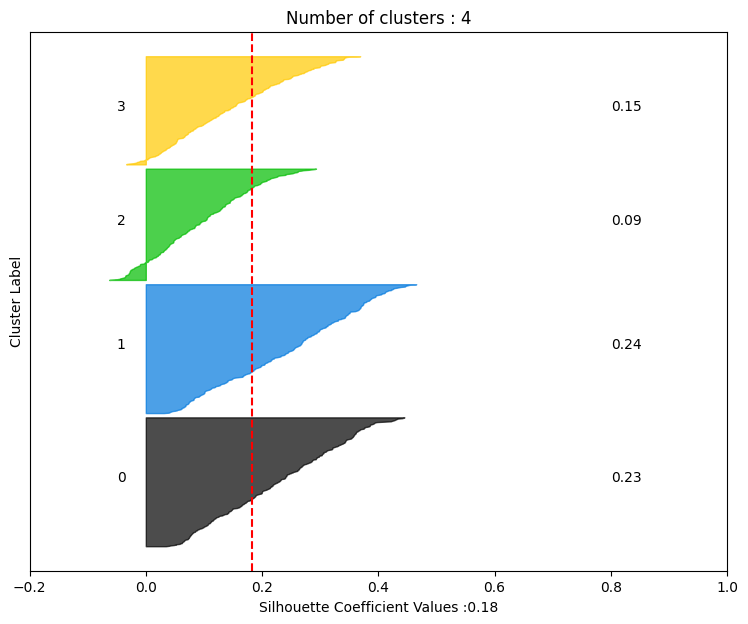

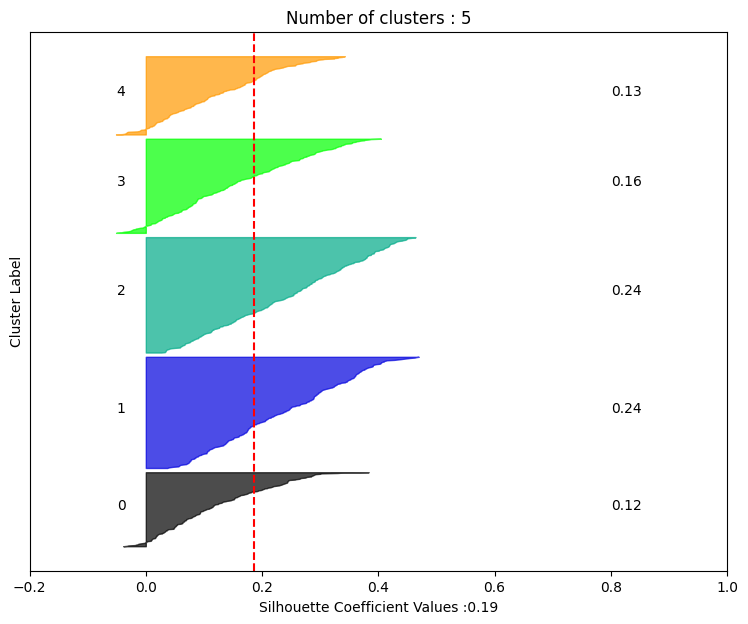

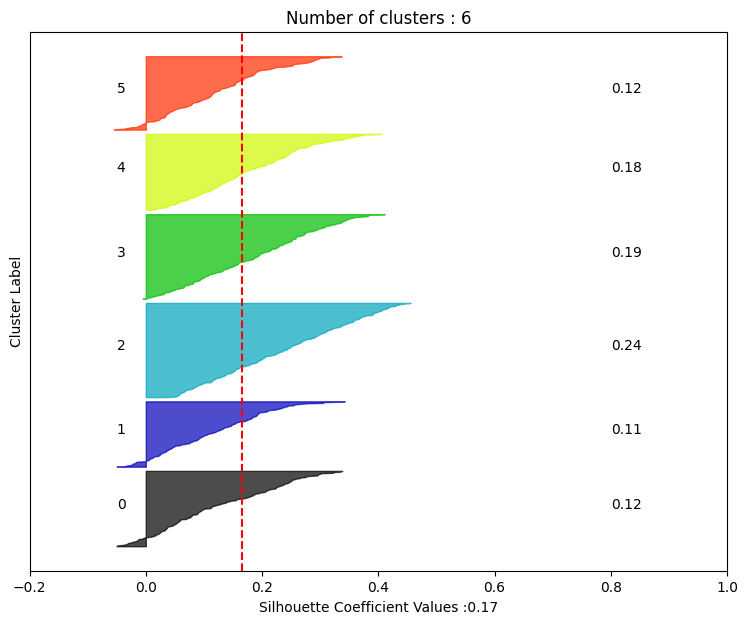

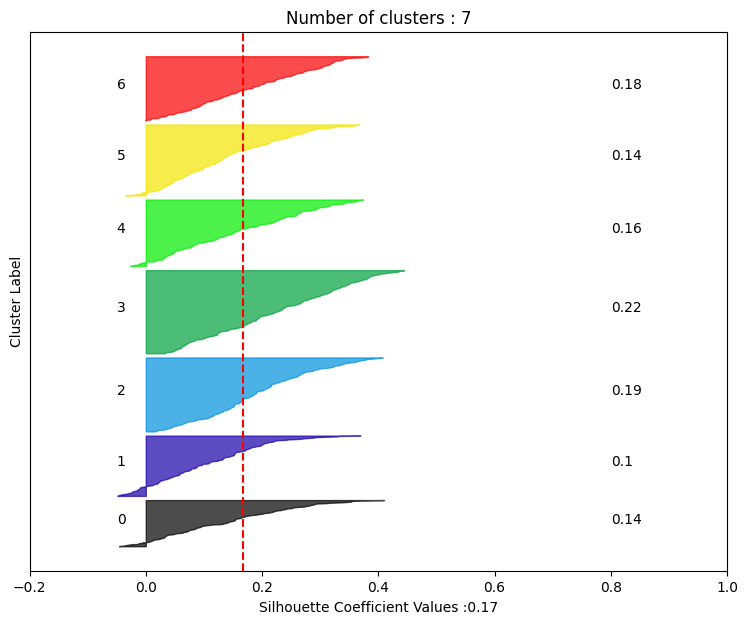

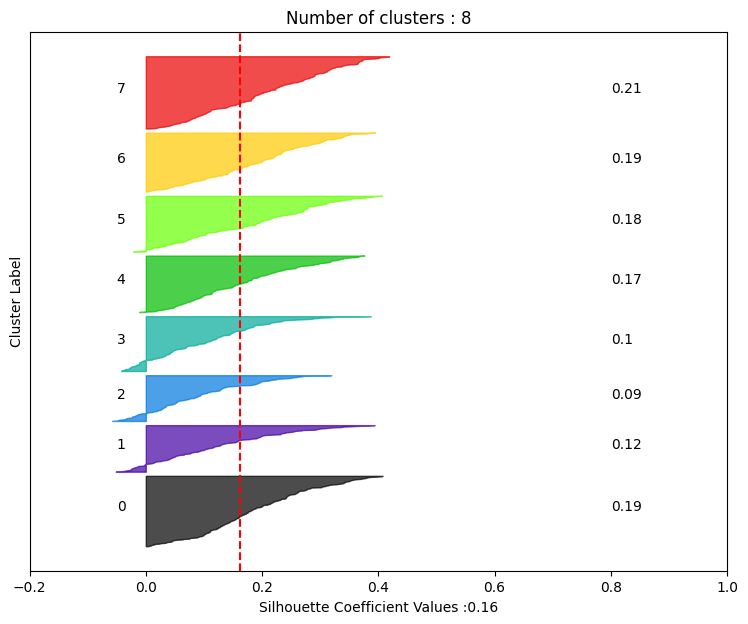

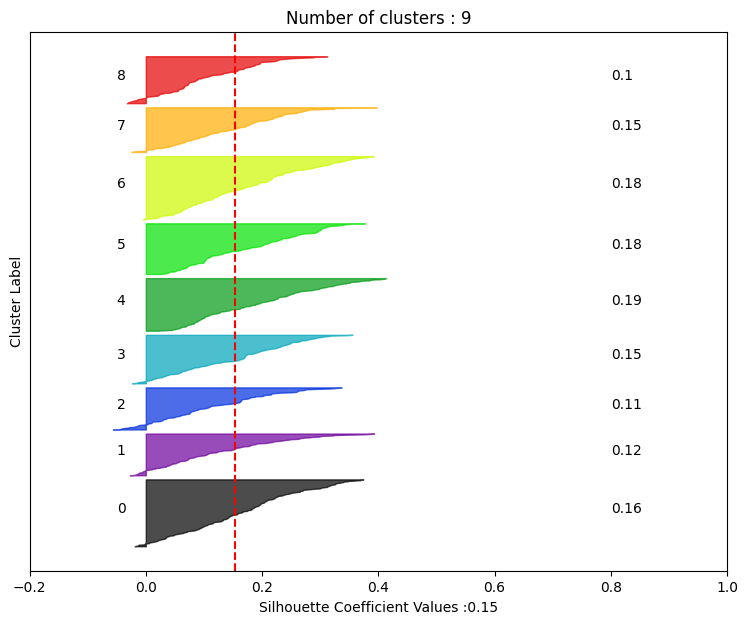

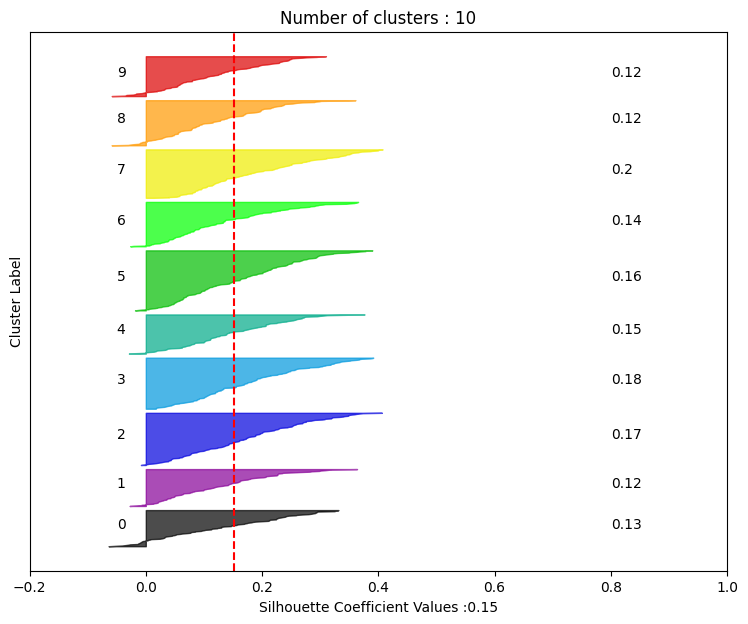

In [ ]:
plot_silhouette(X,[2,3,4,5,6,7,8,9,10],'cosine')

In [ ]:
# KMeans 군집화
distances = pairwise_distances(X, metric='cosine')
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(distances)


# 군집별 평균값 계산
print(pd.DataFrame(X).groupby(kmeans.predict(distances)).size())
cluster_kmeans = pd.DataFrame(X).groupby(kmeans.labels_).mean()
cluster_kmeans

0    488
1    410
2    328
dtype: int64


in_rate  heading_rate  short_rate  long_rate  side_one  center_one  \
0  0.354888      0.690559   -0.658560   0.671288 -0.108155   -0.638751   
1  0.142934     -0.410828    0.595135  -0.499583  0.664058    0.815657   
2 -0.706671     -0.513881    0.235891  -0.374266 -0.669159   -0.069234   

     df_one  
0 -0.072468  
1 -0.311051  
2  0.496633

In [ ]:
pd.DataFrame(scaler.inverse_transform(X),
             columns=features).groupby(kmeans.labels_).mean()

in_rate  heading_rate  short_rate  long_rate   side_one  center_one  \
0  0.681498      0.190139    0.698937   0.068804  17.759920   29.687960   
1  0.656736      0.108663    0.801689   0.040633  20.029001   35.751387   
2  0.557476      0.101040    0.772246   0.043648  16.111460   32.062275   

     df_one  
0  3.925773  
1  3.785029  
2  4.261495

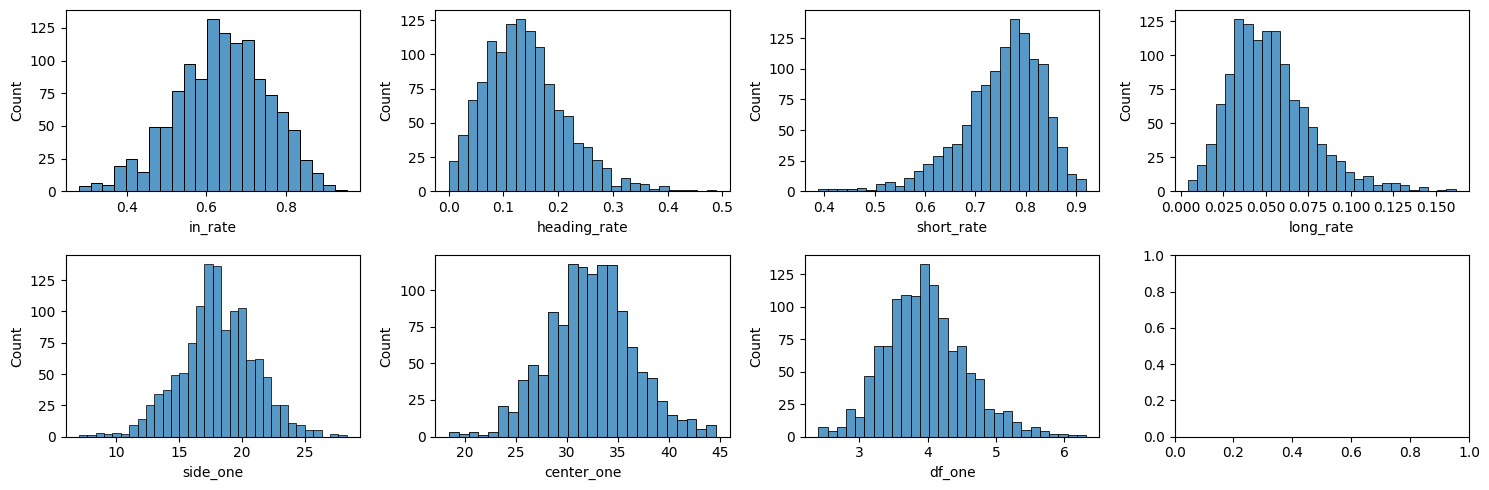

In [ ]:
# 분포 확인 후 해석
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

for i, var in enumerate(df.columns):
    col = i if i<4 else i-4
    row = 0 if i<4 else 1
    sns.histplot(data=df, x=var, ax=axs[row,col])

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

in_rate  heading_rate   short_rate    long_rate     side_one  \
count  1226.000000   1226.000000  1226.000000  1226.000000  1226.000000   
mean      0.640037      0.139054     0.752912     0.052653    18.077724   
std       0.116878      0.074006     0.081993     0.024070     2.939610   
min       0.279927      0.000000     0.388189     0.004125     7.088235   
25%       0.562538      0.086134     0.708409     0.035610    16.361742   
50%       0.644725      0.131421     0.766965     0.049190    17.978299   
75%       0.719692      0.181630     0.810380     0.065318    19.949342   
max       0.953549      0.489052     0.920070     0.161810    28.281250   

        center_one       df_one  
count  1226.000000  1226.000000  
mean     32.350913     3.968523  
std       4.170700     0.590157  
min      18.394737     2.400000  
25%      29.652431     3.564833  
50%      32.383333     3.937500  
75%      34.925116     4.312500  
max      44.666667     6.320000

1. 헤딩 롱패스 쓰루패스 사이드 측면선호
2. 측면중원 모두 선호 짤패 > 지공 
3. 후방 빌드업 중거리
***
# agg

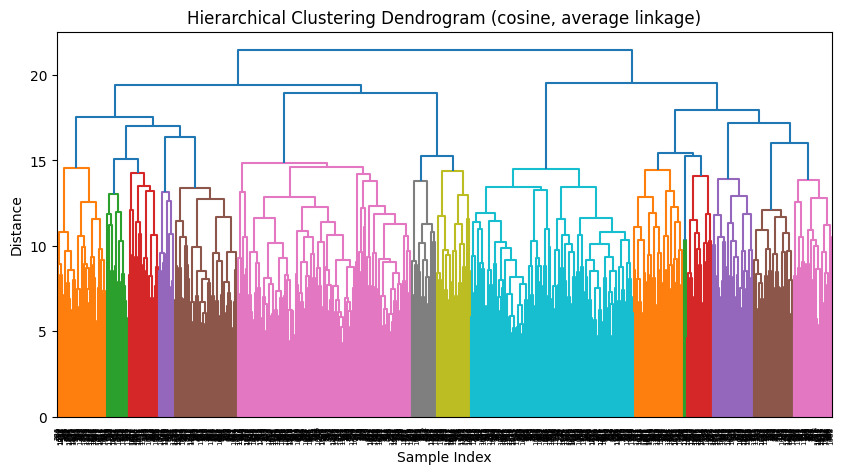

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드 및 cosine distance 계산
cos_dist = 1 - cosine_similarity(X)

# linkage 계산
Z = linkage(cos_dist, method='average')

# dendrogram 그리기
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram (cosine, average linkage)')
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

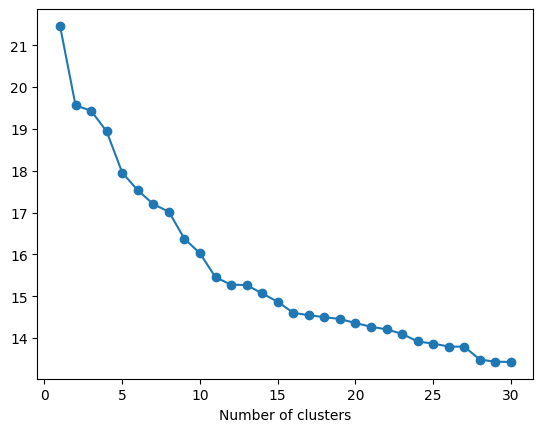

In [ ]:
# Elbow Method로 최적의 군집 수 찾기
last = Z[-30:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, marker='o')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
Agg = AgglomerativeClustering(n_clusters=11, linkage='ward',metric='euclidean')

print(pd.DataFrame(df).groupby(Agg.fit_predict(X)).size())
cluster_agg = pd.DataFrame(df).groupby(Agg.fit_predict(X)).mean()
cluster_agg

0     332
1     160
2      70
3      88
4     111
5     111
6      77
7      54
8      89
9      53
10     81
dtype: int64


in_rate  heading_rate  short_rate  long_rate   side_one  center_one  \
0   0.603049      0.122818    0.768322   0.055374  18.681320   32.117705   
1   0.687888      0.183300    0.701046   0.080732  16.682492   28.491158   
2   0.760546      0.136656    0.675622   0.041556  17.654163   32.205778   
3   0.616402      0.147852    0.622008   0.063357  16.101115   27.034257   
4   0.727832      0.089980    0.807604   0.032695  21.196402   37.255738   
5   0.624156      0.121249    0.786376   0.040520  19.306527   34.505401   
6   0.460933      0.091670    0.801898   0.043482  14.995252   33.030204   
7   0.725231      0.291024    0.736904   0.075678  18.802103   30.496881   
8   0.541922      0.101728    0.819185   0.034752  19.296952   36.626556   
9   0.698145      0.077487    0.784502   0.036025  13.658312   30.976436   
10  0.703347      0.227398    0.751030   0.051890  18.914951   33.950354   

      df_one  
0   3.707941  
1   3.954006  
2   3.571089  
3   4.464344  
4   3.798142  
5   4.845234  
6   4.147767  
7   3.391584  
8   3.702532  
9   4.220812  
10  4.243537

In [ ]:
df.describe()

in_rate  heading_rate   short_rate    long_rate     side_one  \
count  1226.000000   1226.000000  1226.000000  1226.000000  1226.000000   
mean      0.640037      0.139054     0.752912     0.052653    18.077724   
std       0.116878      0.074006     0.081993     0.024070     2.939610   
min       0.279927      0.000000     0.388189     0.004125     7.088235   
25%       0.562538      0.086134     0.708409     0.035610    16.361742   
50%       0.644725      0.131421     0.766965     0.049190    17.978299   
75%       0.719692      0.181630     0.810380     0.065318    19.949342   
max       0.953549      0.489052     0.920070     0.161810    28.281250   

        center_one       df_one  
count  1226.000000  1226.000000  
mean     32.350913     3.968523  
std       4.170700     0.590157  
min      18.394737     2.400000  
25%      29.652431     3.564833  
50%      32.383333     3.937500  
75%      34.925116     4.312500  
max      44.666667     6.320000

너무 많음...
***
# spectral

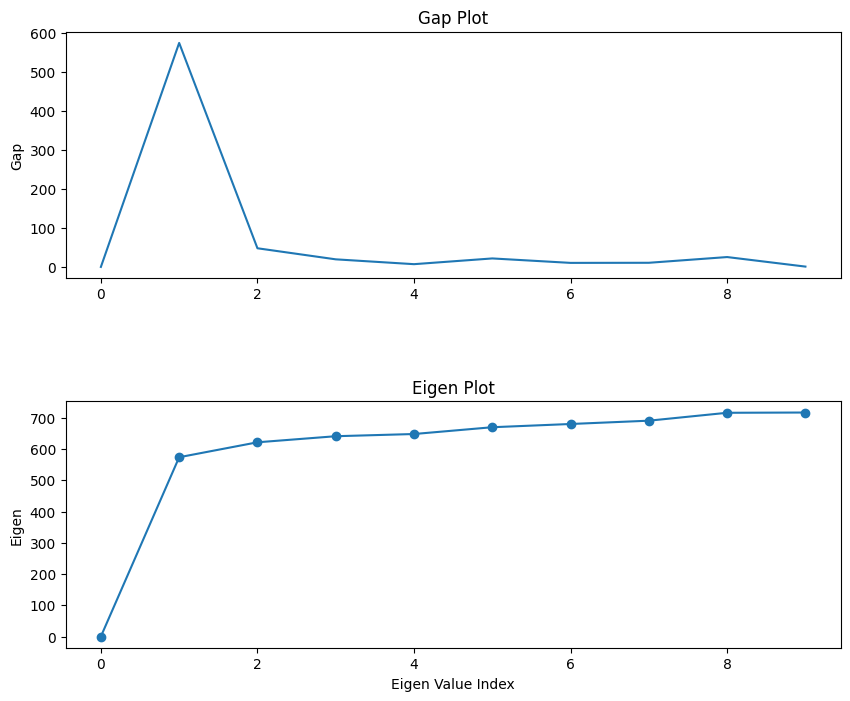

Optimal number of clusters: 1


In [ ]:
from sklearn.cluster import SpectralClustering
from scipy.sparse.linalg import eigsh

# 유사도 행렬 생성
distances = pairwise_distances(X, metric='cosine')
affinity = np.exp(-distances ** 2 / (2. * np.median(distances)))

# Eigenvalue 분해
laplacian = np.diag(affinity.sum(axis=1)) - affinity
eigenvals, eigenvecs = eigsh(laplacian, k=10, which='SM')

# Eigen Gap 계산
gaps = list(np.diff(eigenvals))
gaps.insert(0,0)
# Gap 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plt.axes(axes[0])
plt.plot(gaps)
plt.title('Gap Plot')
plt.ylabel('Gap')

plt.axes(axes[1])
plt.plot(eigenvals,marker='o')
plt.title('Eigen Plot')
plt.xlabel('Eigen Value Index')
plt.ylabel('Eigen')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 최적의 군집 개수 계산
k = np.argmax(gaps)
print('Optimal number of clusters:', k)

In [ ]:
# Spectral Clustering
sc = SpectralClustering(n_clusters=k, affinity='precomputed', assign_labels='kmeans')
labels = sc.fit_predict(distances)

Counter(labels)

Counter({0: 1224, 1: 2})

군집화가 적합하지 않대요
***
# visualization

In [ ]:
df['cl'] = kmeans.labels_

In [ ]:
dfs = df.reset_index(drop=True)

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# 데이터 생성
cluster_labels = dfs['cl'].unique()
clusters = [dfs[dfs['cl'] == i] for i in cluster_labels]

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

for i in range(len(cluster_labels)):
    fig.add_trace(
        go.Scatter3d(x=clusters[i]['in_rate'], y=clusters[i]['short_rate'], z=clusters[i]['center_one'], 
                     mode='markers', 
                     marker=dict(size=3, colorscale='Viridis', opacity=0.8), 
                     name=f'Cluster {i}')
    )
    
# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


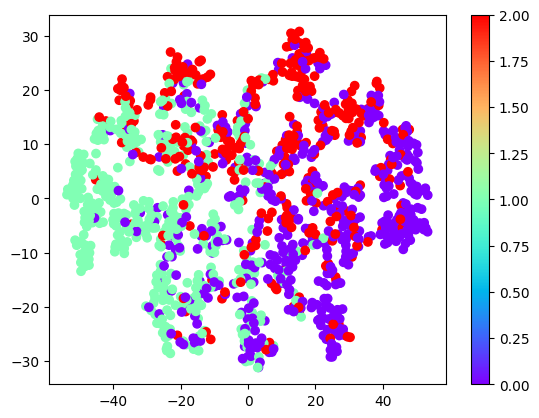

In [ ]:
from sklearn.manifold import TSNE

# t-SNE 객체 생성
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# t-SNE 학습
df3 = df.drop('cl',axis=1)
X_embedded = tsne.fit_transform(df3)

labels = kmeans.labels_

# 군집화 결과 시각화
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='rainbow')
plt.colorbar()
plt.show()

In [ ]:
# t-sne 모델 생성
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df3)

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

fig.add_trace(
    go.Scatter3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2], 
                 mode='markers', 
                 marker=dict(size=3, color= labels, colorscale='Viridis', opacity=0.8), 
                 name='Clusters')
)

# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


In [ ]:
from pyclustertend import hopkins ## the hopkins test

hopkins(X.values,X.shape[0])

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Index 계산
score = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski-Harabasz Index:", score)


Calinski-Harabasz Index: 223.2765445958014


# 포메이션과 접목

In [ ]:
user_data.groupby(['formation','labels']).size()

formation  labels
424        0          22
           1           2
           2           8
433        0         111
           1          45
           2          53
442        0          47
           1          38
           2          27
451        0         223
           1         283
           2         123
523        0          58
           1          33
           2          71
532        0          27
           1           9
           2          46
dtype: int64

In [ ]:
win_lose = pd.merge(user_data,data[['id_formation','matchResult']],how='left',on='id_formation')
win_lose.groupby(['formation','labels']).matchResult.value_counts()

formation  labels  matchResult
424        0       패               123
                   승               117
                   무                68
           1       승                11
                   패                 7
                   무                 5
           2       패                45
                   승                37
                   무                27
433        0       승               641
                   패               606
                   무               351
           1       승               283
                   패               265
                   무               124
           2       승               326
                   패               296
                   무               171
442        0       승               290
                   패               255
                   무               130
           1       승               249
                   패               233
                   무               101
           2       승             